# Importación inicial

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [194]:
#DATOS DE DIEGO
import os

periodos = ["first", "second", "third"]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

dfs = {}  # Diccionario para almacenar los DataFrames

for year in years:
    for idx, periodo in enumerate(periodos, start=1):
        csv_path = os.path.join(r"C:\Users\dpine\red_electrica\red_electrica\data", f"df_{year}_{periodo}_period.csv")

        try:
            df = pd.read_csv(csv_path)  # Cargar el archivo CSV

            # Crear el nombre de la variable y guardarla en el diccionario
            var_name = f"df_{year}_{idx}"
            dfs[var_name] = df  

            # Asignar la variable dinámicamente
            globals()[var_name] = df  

            print(f"✅ Archivo cargado en variable y diccionario: {var_name}")
        except FileNotFoundError:
            print(f"⚠️ No se encontró el archivo: {csv_path}")
df_2025_1 = pd.read_csv(r"C:\Users\dpine\red_electrica\red_electrica\data\df_2025_first_period.csv")

✅ Archivo cargado en variable y diccionario: df_2014_1
✅ Archivo cargado en variable y diccionario: df_2014_2
✅ Archivo cargado en variable y diccionario: df_2014_3
✅ Archivo cargado en variable y diccionario: df_2015_1
✅ Archivo cargado en variable y diccionario: df_2015_2
✅ Archivo cargado en variable y diccionario: df_2015_3
✅ Archivo cargado en variable y diccionario: df_2016_1
✅ Archivo cargado en variable y diccionario: df_2016_2
✅ Archivo cargado en variable y diccionario: df_2016_3
✅ Archivo cargado en variable y diccionario: df_2017_1
✅ Archivo cargado en variable y diccionario: df_2017_2
✅ Archivo cargado en variable y diccionario: df_2017_3
✅ Archivo cargado en variable y diccionario: df_2018_1
✅ Archivo cargado en variable y diccionario: df_2018_2
✅ Archivo cargado en variable y diccionario: df_2018_3
✅ Archivo cargado en variable y diccionario: df_2019_1
✅ Archivo cargado en variable y diccionario: df_2019_2
✅ Archivo cargado en variable y diccionario: df_2019_3
✅ Archivo 

In [ ]:
#DATOS DE PAULA
import os

periodos = ["first", "second", "third"]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

dfs = {}  # Diccionario para almacenar los DataFrames

for year in years:
    for idx, periodo in enumerate(periodos, start=1):
        csv_path = os.path.join(r"C:\Users\dpine\red_electrica\red_electrica\data", f"df_{year}_{periodo}_period.csv")

        try:
            df = pd.read_csv(csv_path)  # Cargar el archivo CSV

            # Crear el nombre de la variable y guardarla en el diccionario
            var_name = f"df_{year}_{idx}"
            dfs[var_name] = df  

            # Asignar la variable dinámicamente
            globals()[var_name] = df  

            print(f"✅ Archivo cargado en variable y diccionario: {var_name}")
        except FileNotFoundError:
            print(f"⚠️ No se encontró el archivo: {csv_path}")

In [ ]:
#DATOS DE JOSE
import os

periodos = ["first", "second", "third"]
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

dfs = {}  # Diccionario para almacenar los DataFrames

for year in years:
    for idx, periodo in enumerate(periodos, start=1):
        csv_path = os.path.join(r"C:\Users\dpine\red_electrica\red_electrica\data", f"df_{year}_{periodo}_period.csv")

        try:
            df = pd.read_csv(csv_path)  # Cargar el archivo CSV

            # Crear el nombre de la variable y guardarla en el diccionario
            var_name = f"df_{year}_{idx}"
            dfs[var_name] = df  

            # Asignar la variable dinámicamente
            globals()[var_name] = df  

            print(f"✅ Archivo cargado en variable y diccionario: {var_name}")
        except FileNotFoundError:
            print(f"⚠️ No se encontró el archivo: {csv_path}")

In [195]:
df = df_2014_1
for x in list(dfs.keys())[1:]:
    df = pd.concat([df,dfs[x]], axis = 0)
df = pd.concat([df,df_2025_1], axis = 0)

# Calidad de datos

In [196]:
df.head()

,datetime_utc,Demanda real
0,2013-12-31 23:00:00+00:00,24546.0
1,2013-12-31 23:10:00+00:00,24309.0
2,2013-12-31 23:20:00+00:00,24348.0
3,2013-12-31 23:30:00+00:00,24321.0
4,2013-12-31 23:40:00+00:00,24194.0


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736022 entries, 0 to 26044
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  736022 non-null  object 
 1   Demanda real  736022 non-null  float64
dtypes: float64(1), object(1)
memory usage: 16.8+ MB


In [198]:
df.isna().sum()

datetime_utc    0
Demanda real    0
dtype: int64

In [199]:
df.nunique()

datetime_utc    736022
Demanda real     22930
dtype: int64

In [200]:
df.duplicated().sum()

np.int64(0)

In [201]:
df["datetime_utc"] = pd.to_datetime(df["datetime_utc"], utc = True)

In [202]:
df["Demanda real"] = df["Demanda real"].astype("float32")

In [203]:
df.rename(columns = {"datetime_utc":"date", "Demanda real":"value"}, inplace = True)

In [204]:
df.dtypes

date     datetime64[ns, UTC]
value                float32
dtype: object

# Añadimos variables de interés

In [205]:
df["hora"] = df.date.dt.hour

In [206]:
df["dia_semana"] = df.date.dt.weekday

In [207]:
df["mes"] = df.date.dt.month

In [208]:
df["trimestre"] = df.date.dt.quarter

In [209]:
df["año"] = df.date.dt.year

In [210]:
import holidays

es_holidays = holidays.Spain(years=[2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025], observed = True)

df["festivo"] = df["date"].dt.date.isin(es_holidays.keys()).astype(int)

In [211]:
pib = pd.read_excel(r"C:\Users\dpine\red_electrica\red_electrica\data\PIB_trimestral_excel.xlsx")
pib = pib.iloc[8:52,0:2]
dato = pib.loc[pib["Series de resultados detallados"] == "2024T4"]["Unnamed: 1"].values[0] * 1.06
dato = pd.DataFrame({'Series de resultados detallados': ["2025T1"], 'Unnamed: 1': [dato]})  # Nueva fila como DataFrame
pib = pd.concat([pib, dato], ignore_index=True)

df['año_trimestre'] = df['año'].astype(str) + 'T' + df['trimestre'].astype(str)
df = df.merge(pib, how= "left", left_on = "año_trimestre", right_on = "Series de resultados detallados")
df.drop(columns = ["año_trimestre", "Series de resultados detallados"], inplace = True)
df.rename(columns = {"Unnamed: 1":"pib_trimestral"}, inplace = True)

c:\Users\dpine\red_electrica\red_electrica\venv2\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [212]:
df = df.loc[~(df.año == 2013)]
df = df.loc[~((df.año == 2025) & (df.mes == 4))]

In [219]:
df.nunique()

date              735903
value              22930
hora                  24
dia_semana             7
mes                   12
trimestre              4
año                   12
festivo                2
pib_trimestral        45
dtype: int64

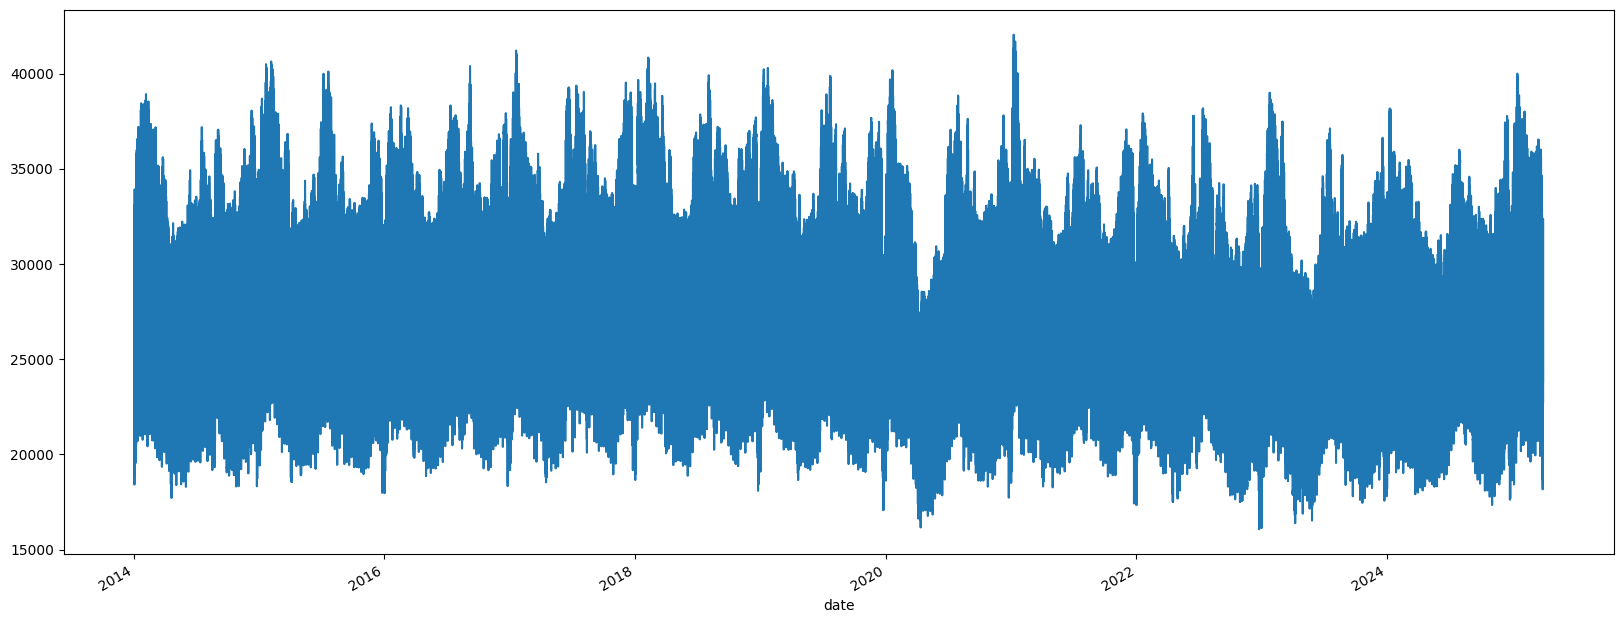

In [214]:
df.set_index("date")["value"].plot(figsize = (20,8));

precio electricidad, temperatura cada mes

atipicos, describe()